In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-d9begh3n because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
file = uproot.open("../analysis/gen_information_A_2Tau/CMSSW_10_6_20/src/Gen/genInfo_only_A_2Tau_dR0p4_train.root")
# file = uproot.open("../analysis/gen_information_A_2Tau/CMSSW_10_6_20/src/Gen/genInfo_only_U_2Tau_dR0p4_train.root")
# file = uproot.open("../analysis/gen_information_A_2Tau/CMSSW_10_6_20/src/Gen/genInfo_only_H_AA_2Tau_dR0p4_train.root")
# 
RHTree = file["fevt/RHTree"]
# RHTree.keys()

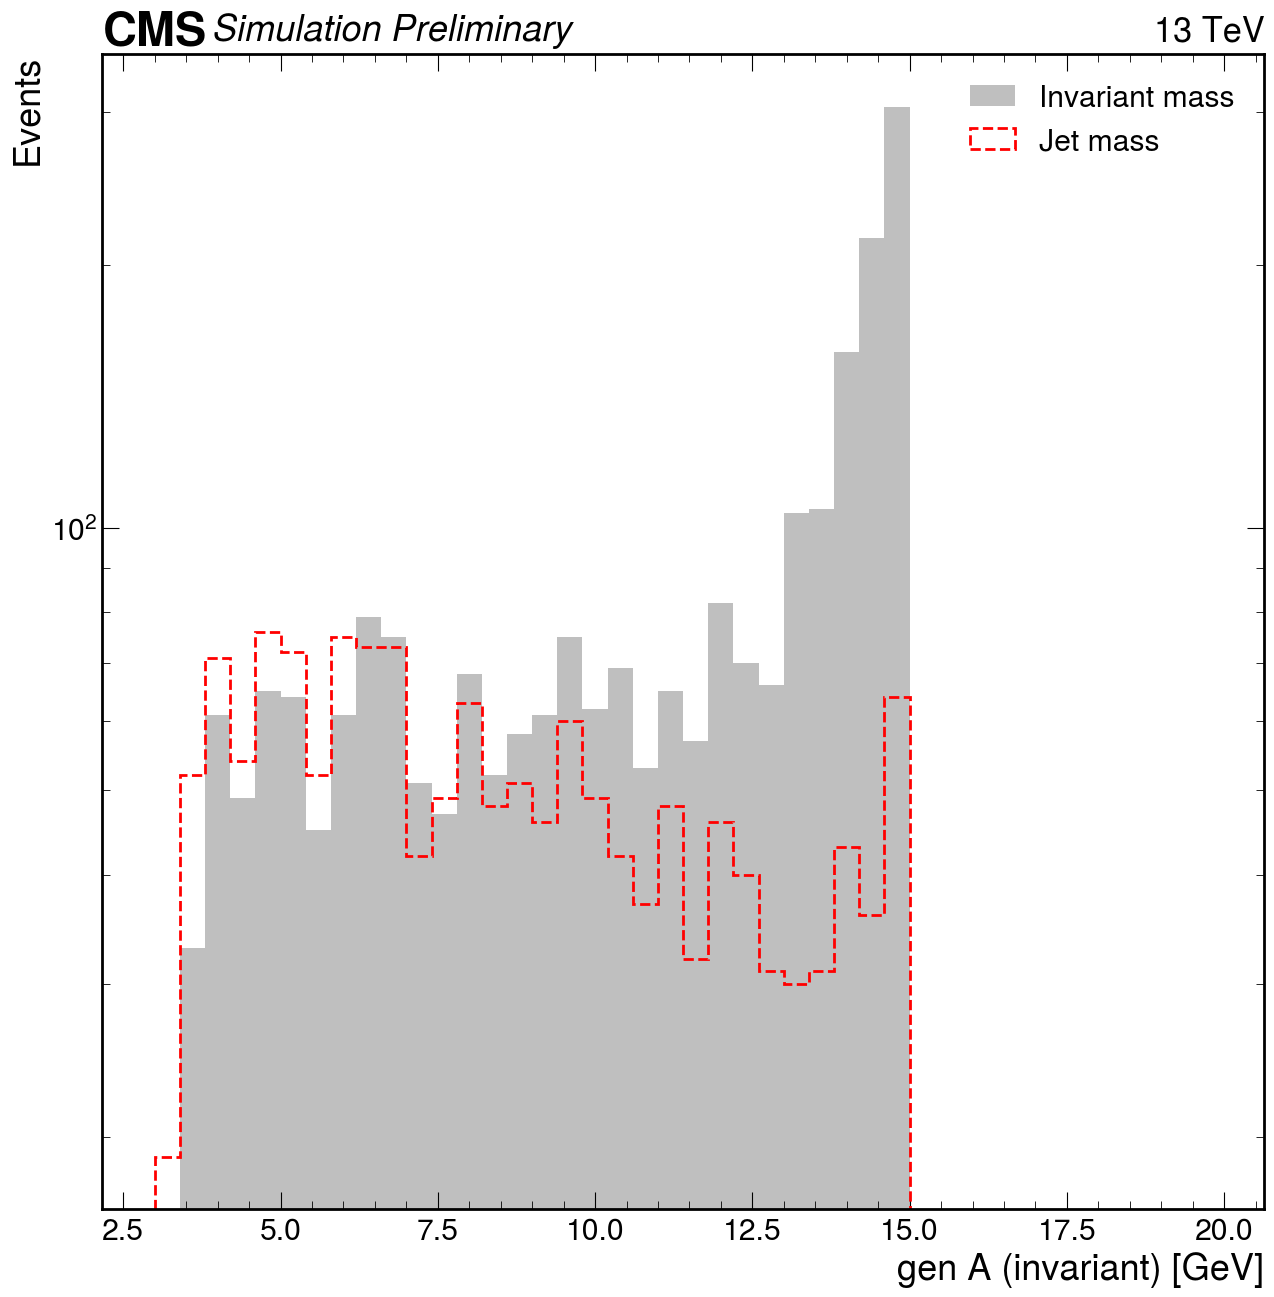

In [3]:
GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
jetM = RHTree.arrays(["jetM"],"jetM > -111",library="pd")['jetM']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_invariant,bins=np.arange(3.,17,0.4),color='grey',alpha=0.5,label="Invariant mass",density =0,log=1)
plt.hist(jetM,bins=np.arange(3.,20,0.4),histtype='step',linestyle='--',linewidth=2, color='red',label="Jet mass",density=0,log=1)
# plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

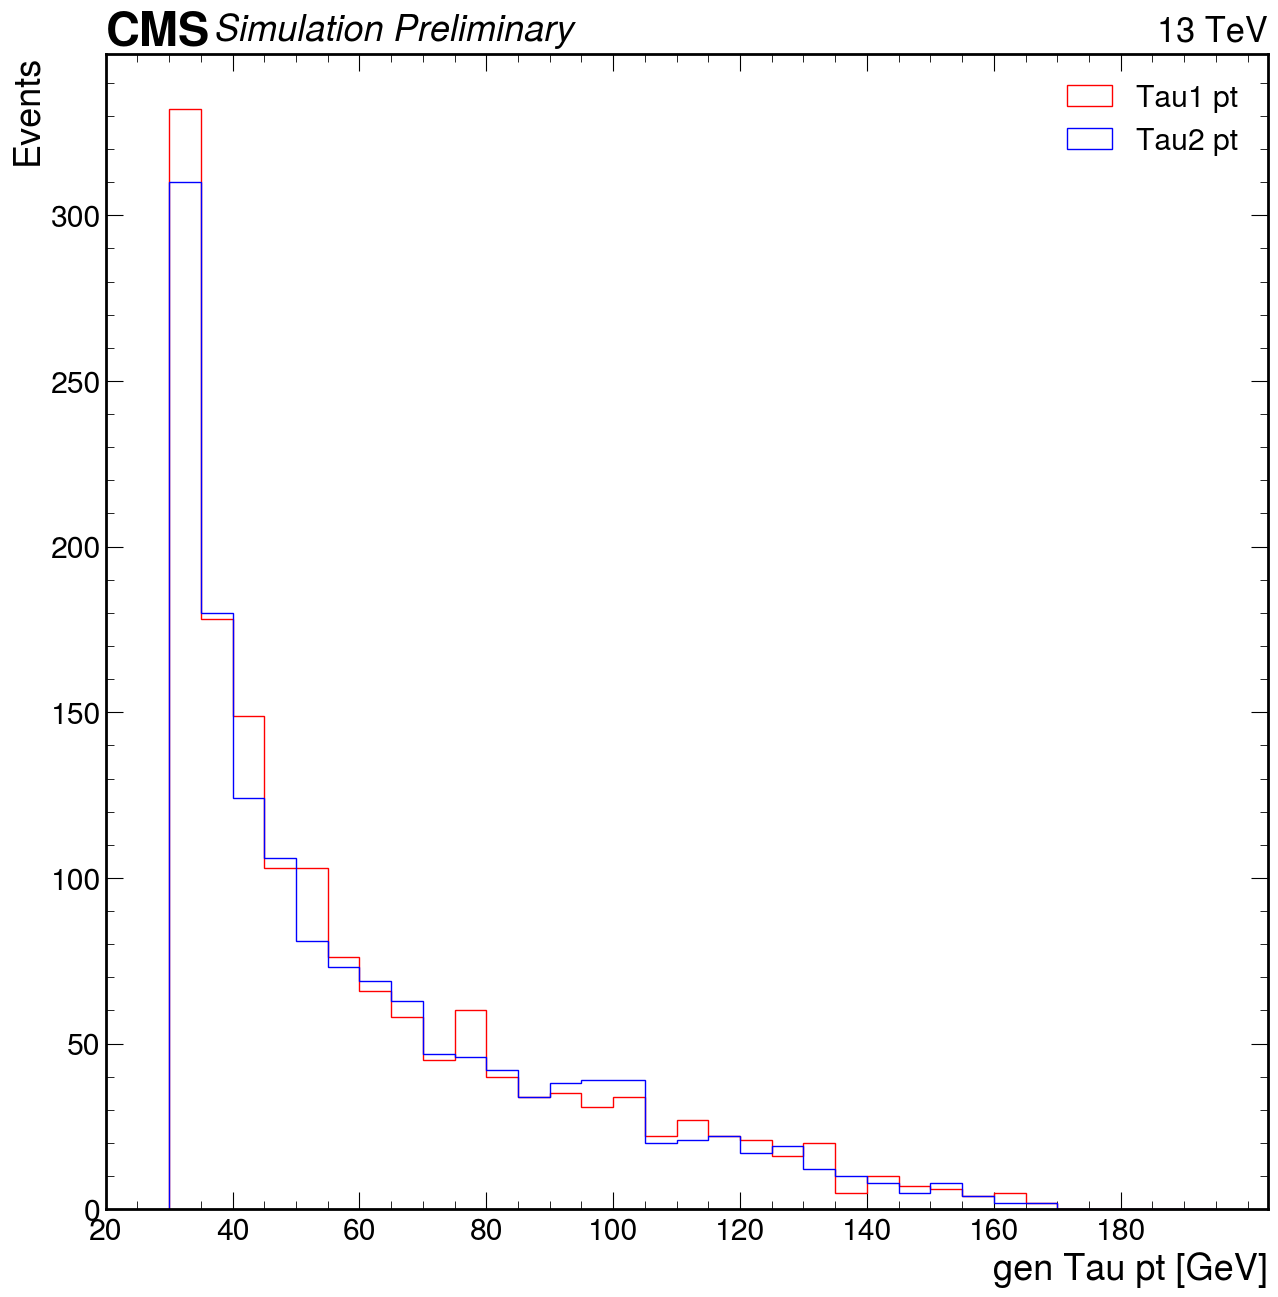

In [4]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(30,200,5),histtype='step', color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,200,5),histtype='step', color='b',label="Tau2 pt")

plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [5]:
# file=uproot.open("root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/gen_HToAATo4Tau_Hadronic_tauDR0p4_M10_ctau0To3_eta0To2p4_pythia8_2018UL/HtoAATo4Tau_Hadronic_tauDR0p4_M10_eta0To2p4_pythia8_signal/230725_041228/0000/output_90.root")
# file=uproot.open("root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_unbaise_false_ntuples/230416_184752/0000/output_90.root")
file = uproot.open("../analysis/mass_regreesion_ntuples/CMSSW_10_6_20/src/MLAnalyzer/output.root")
RHTree = file["fevt/RHTree"]
# RHTree.keys()

FileNotFoundError: file not found

    '../analysis/mass_regreesion_ntuples/CMSSW_10_6_20/src/MLAnalyzer/output.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
GenA1_invariant = RHTree.arrays(["a_m"],"a_m > -111",library="pd")['a_m']
jetM = RHTree.arrays(["jetM"],"jetM > -111",library="pd")['jetM']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_invariant,bins=np.arange(3.,17,0.4),color='grey',alpha=0.5,label="Invariant mass",density =0,log=1)
plt.hist(jetM,bins=np.arange(3.,20,0.4),histtype='step',linestyle='--',linewidth=2, color='red',label="Jet mass",density=0,log=1)
# plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [ ]:
Tau1_pt = RHTree.arrays(["Tau1pT"],"Tau1pT > -111",library="pd")['Tau1pT']
Tau2_pt = RHTree.arrays(["Tau2pT"],"Tau2pT > -111",library="pd")['Tau2pT']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(30,200,5),histtype='step', color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,200,5),histtype='step', color='b',label="Tau2 pt")

plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

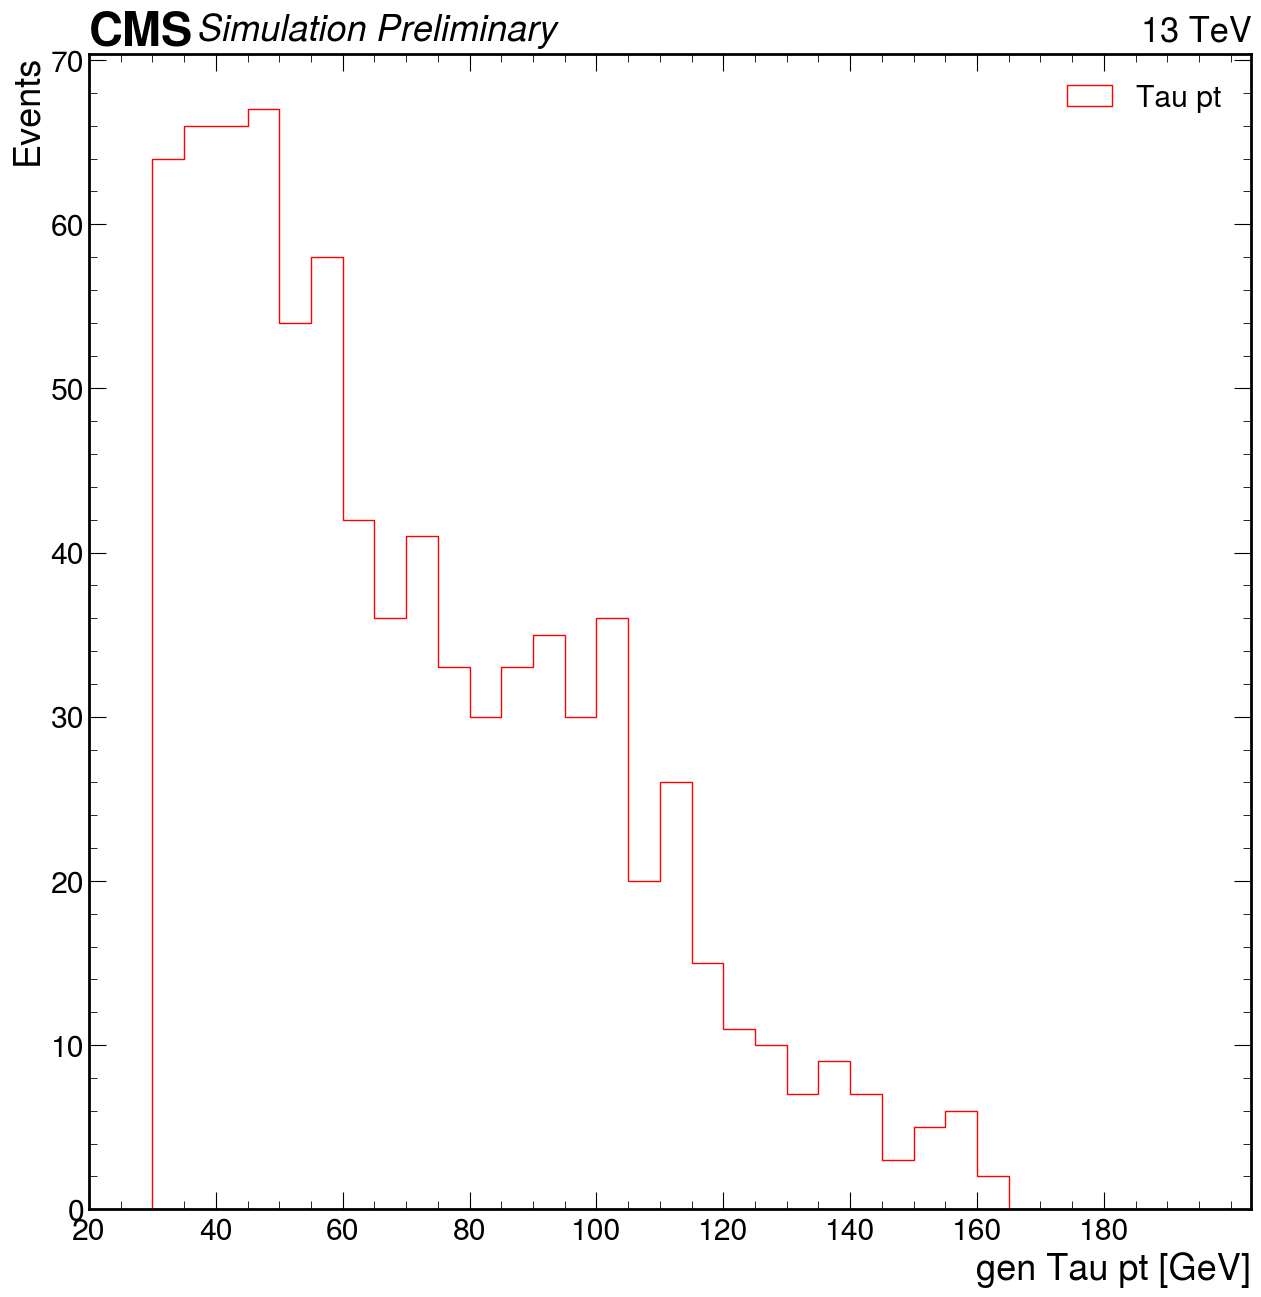

In [44]:
Tau1pT = RHTree.arrays(["Tau1pT"],"Tau1pT > -111",library="pd")['Tau1pT']
Tau2pT = RHTree.arrays(["Tau2pT"],"Tau2pT > -111",library="pd")['Tau2pT']
import pandas as pd
TaupT = pd.concat([Tau1pT, Tau2pT])

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(TaupT,bins=np.arange(30,200,5),histtype='step', color='red',label="Tau pt")

plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()